### Table of contents
[Predefined functions](#funcs)

[Parameters, filenames and directories](#params)

[Reading maps and catalogs](#read)

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from func_stat import *
from func_visualizations import *
from os.path import join
from ast import literal_eval

### Parameters, filenames and directories
<a id='params'>#params</a>

In [56]:
### Files and directories ###
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
nameOfExperiment='ex018'
dirMaps=join(dirSOM,nameOfExperiment,'maps')
dirPlots=join(dirSOM,nameOfExperiment,'plots')
dirDatasets=join(dirSOM,nameOfExperiment,'datasets')

In [3]:
datasetNames={'Train':r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo.csv',
              'Test':r'05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv',
              'Deimos':r'04_COSMOS_DEIMOS_QfFilter_SOMinfo.csv',
              'Run':r'04_COSMOS2015_run_WorkBands_SOMinfo.csv'}

In [23]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
quantErr='quantErr'
mags=['Ksmagap3','Ymagap3','Hmagap3','Jmagap3','Bmagap3','Vmagap3','ipmagap3','rmagap3','umagap3','zppmagap3']

In [5]:
### Format for saving images ###
imSaveFormat='.png'
#imSaveFormat='.eps'

### Reading datasets
<a id='read'>#read</a>

In [7]:
datasets={}
cellIDs=['cellID_TrainSOM','cellID_RunSOM','cellID_RunBigSOM']
for key,val in datasetNames.items():
    datasets[key]=pd.read_csv(join(dirDatasets,val))
    for cellID in cellIDs:
        datasets[key][cellID]=[literal_eval(x) for x in datasets[key][cellID]]

### Quantization error
<a id='qErr'>#qErr</a>

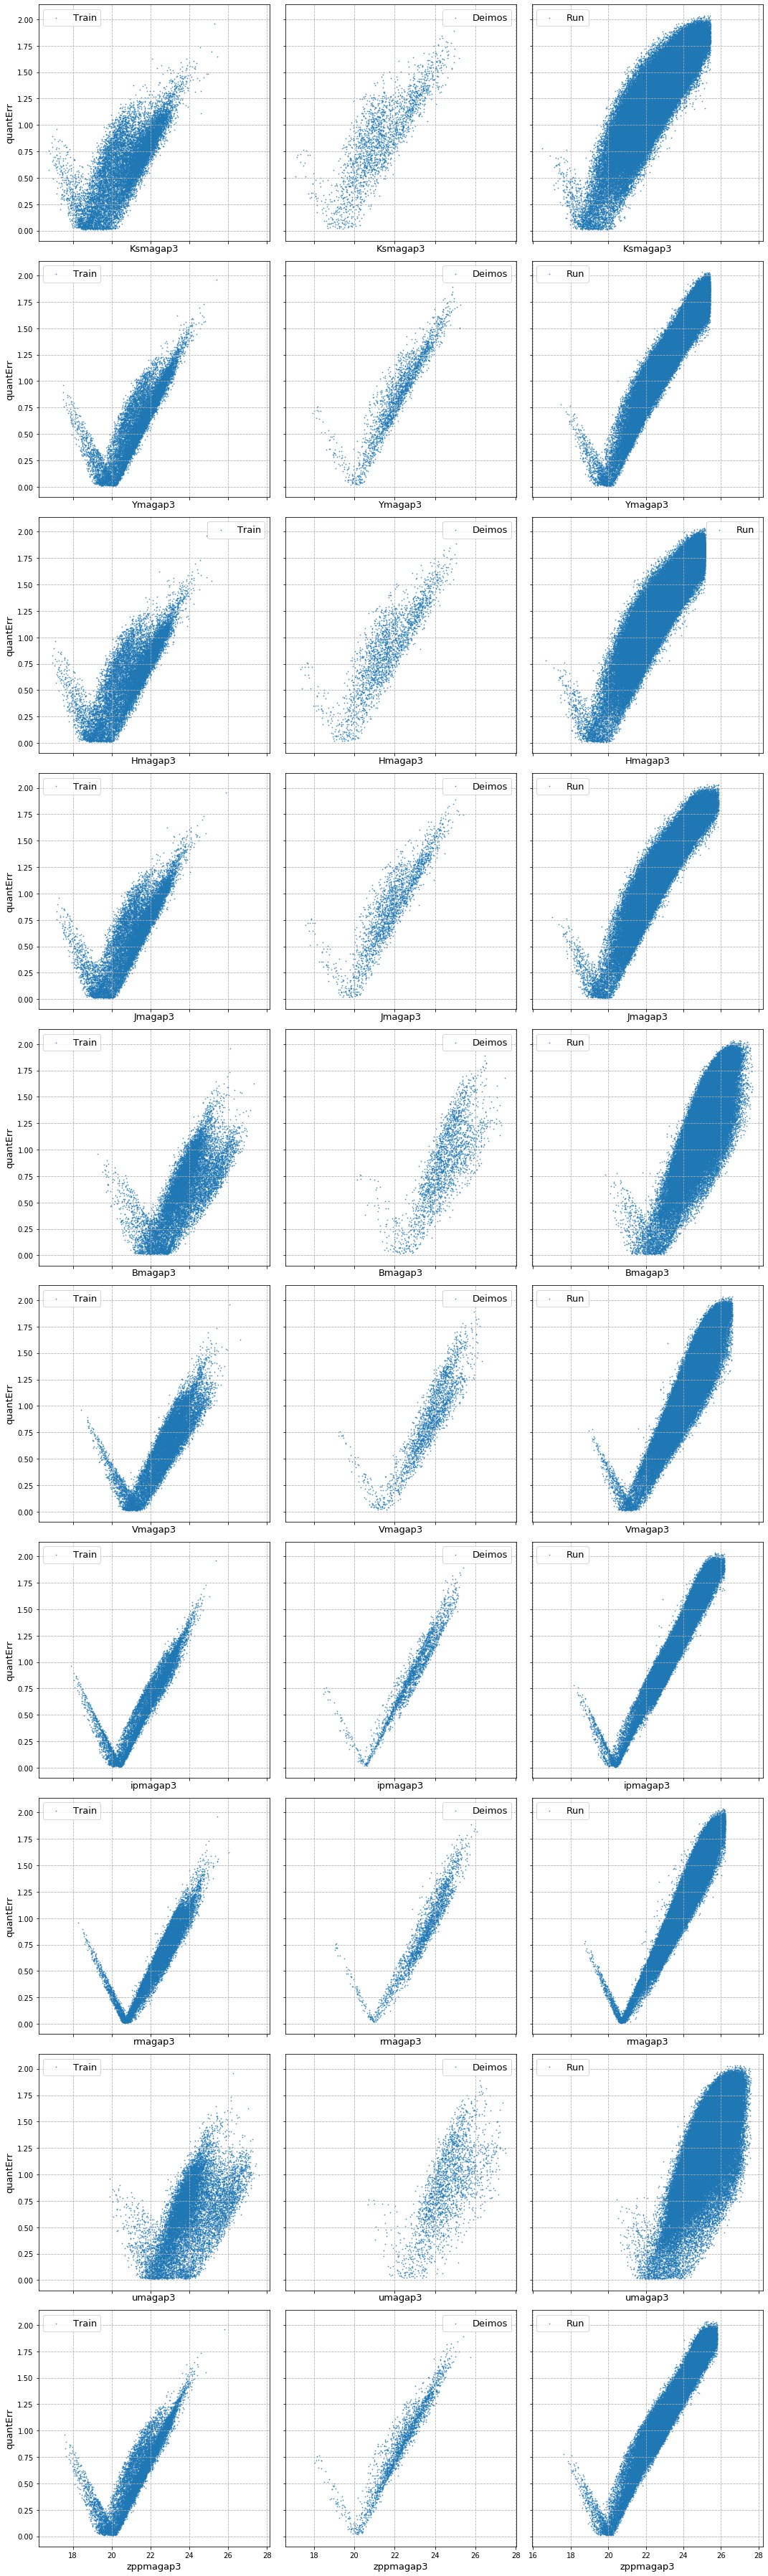

In [41]:
names=['Train','Deimos','Run']
textSize=13
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharey='row',sharex='col')
for i,mag in enumerate(mags):
    for j,name in enumerate(names):
        dataset=datasets[name]
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[mag],dataset['quantErr'],s=0.5,label=name,alpha=0.8)
        axs[i][j].legend()
        axs[i][j].set_xlabel(mag,size=textSize)
        axs[i][j].legend(prop={'size': textSize})
    axs[i][0].set_ylabel('quantErr',size=textSize)
plt.tight_layout()

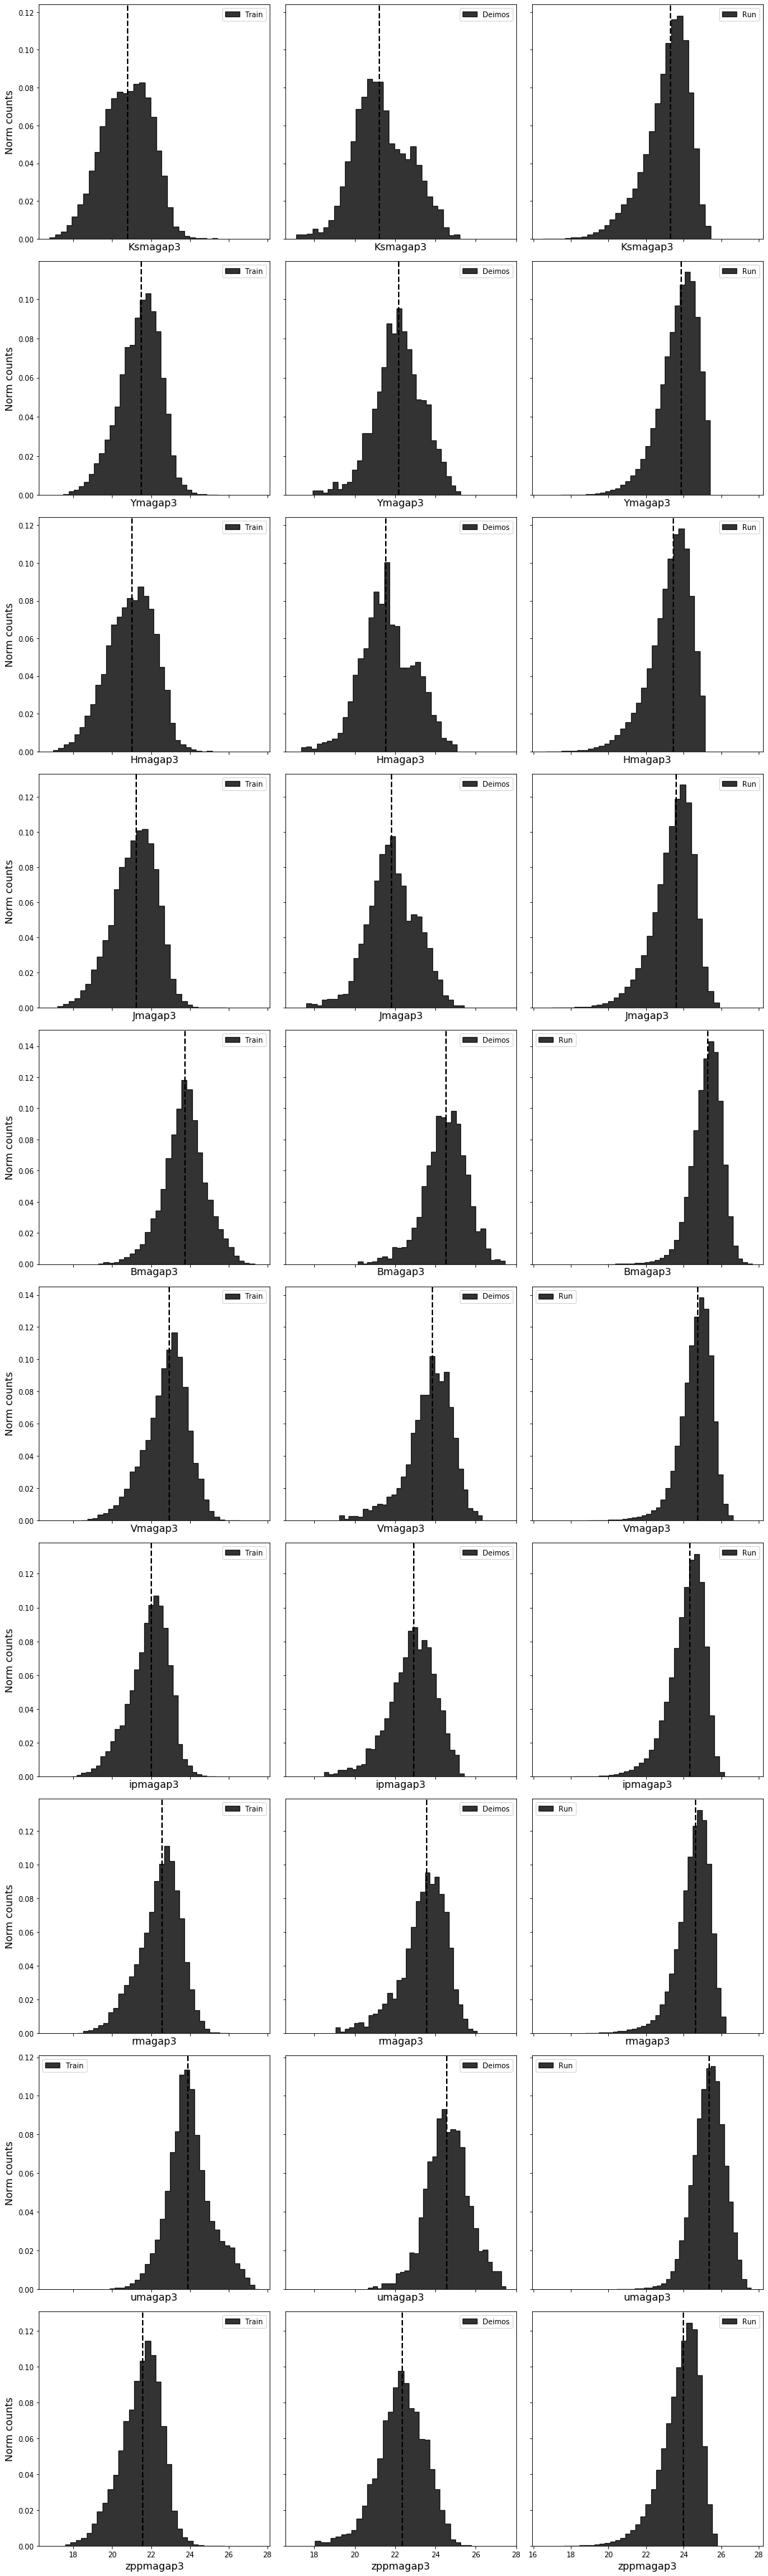

In [35]:
names=['Train','Deimos','Run']
bins=30
alpha=0.8
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharey='row',sharex='col')
for i,mag in enumerate(mags):
    for j,name in enumerate(names):
        plotMultiBar2([datasets[name][mag]],bins,[name],alpha,normCounts=True,xlabel=mag,axs=axs[i][j])
    axs[i][0].set_ylabel('Norm counts')
plt.tight_layout()

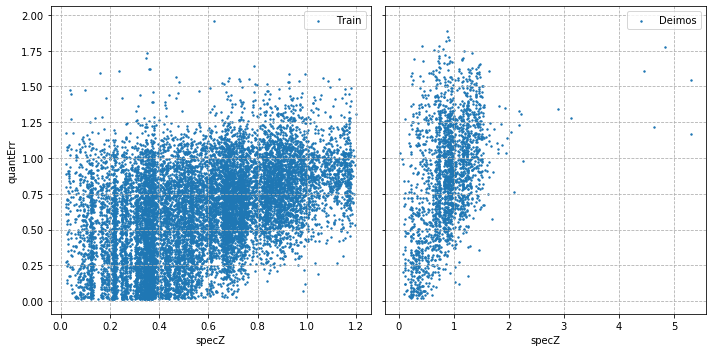

In [39]:
names=['Train','Deimos']
fig,axs=plt.subplots(1,2,figsize=(10,5),sharey='row',sharex='col')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset[specZ],dataset['quantErr'],s=2,label=name,alpha=1)
    axs[i].legend()
    axs[i].set_xlabel(specZ)
axs[0].set_ylabel('quantErr')
plt.tight_layout()

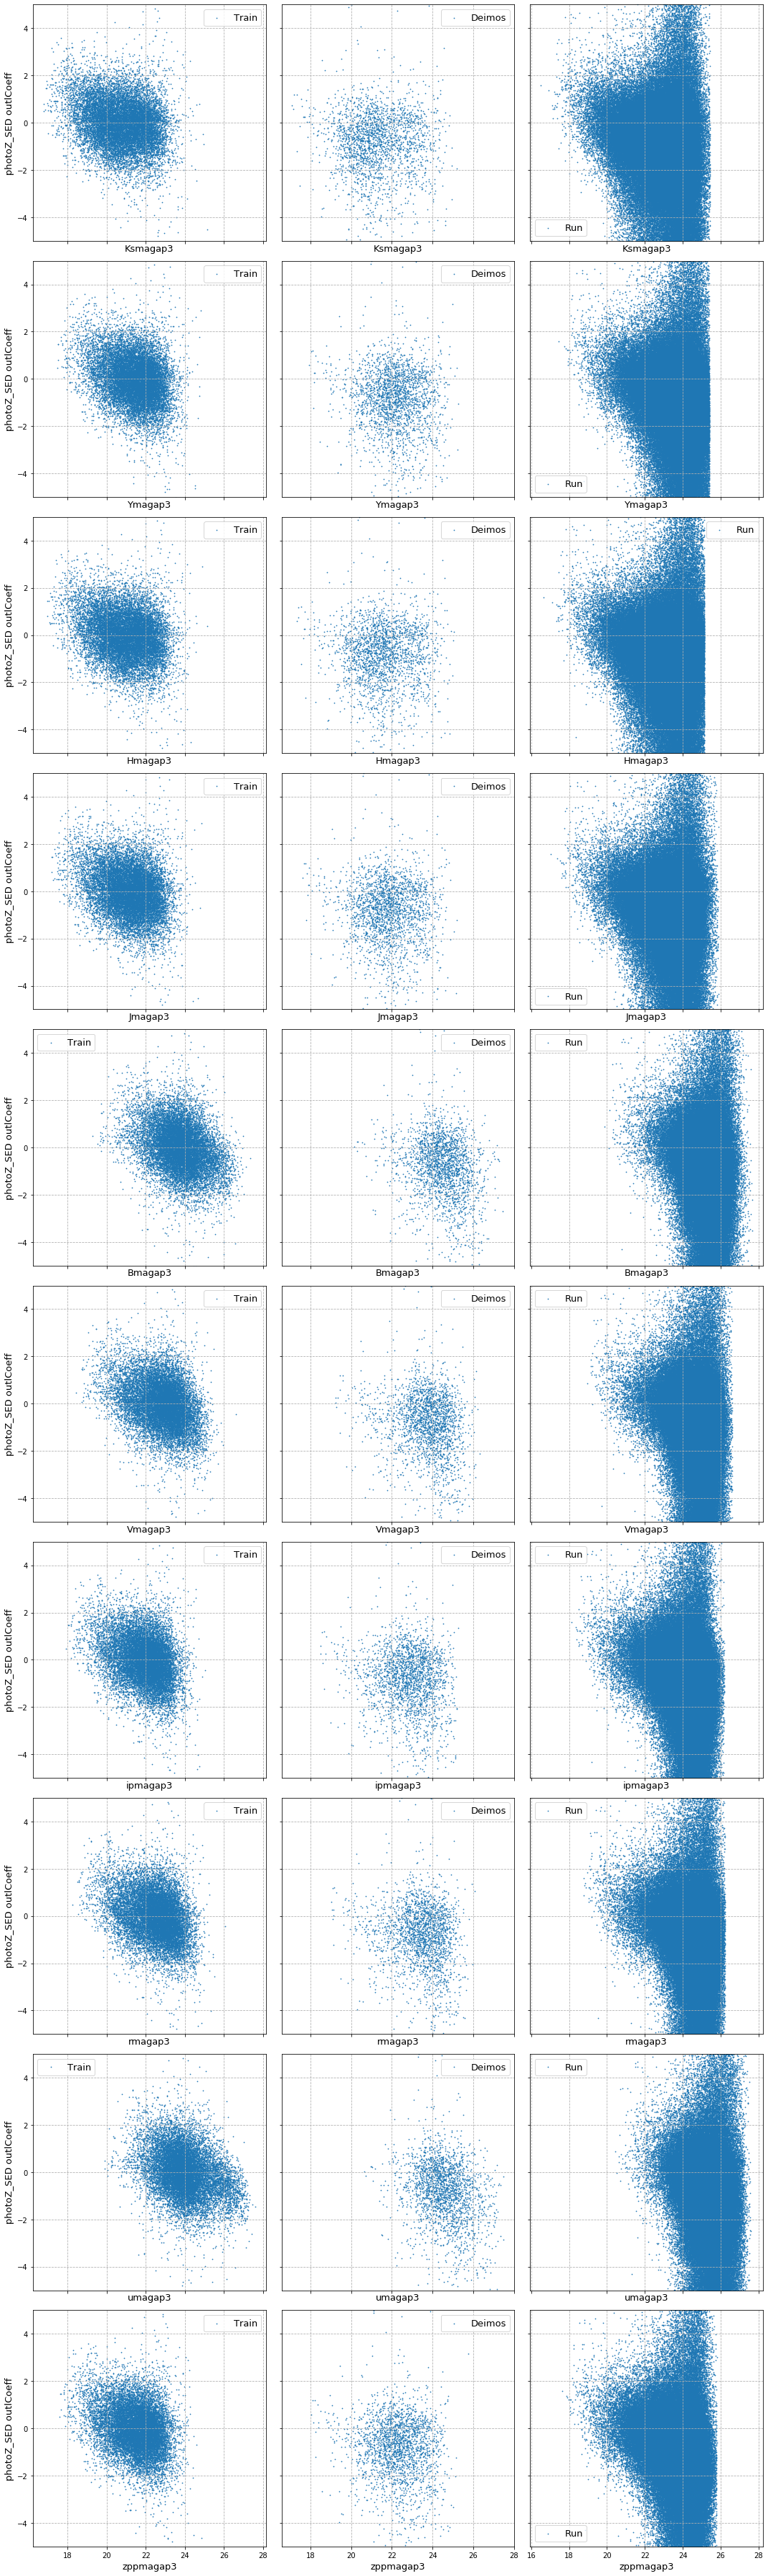

In [66]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharex='col',sharey='row')
for i,mag in enumerate(mags):
    for j,name in enumerate(names):
        dataset=datasets[name]
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[mag],dataset[photoZ_SED+'_outlCoeff'],s=0.5,label=name)
        axs[i][j].set_xlabel(mag,size=textSize)
        axs[i][j].legend(prop={'size': textSize})
        axs[i][j].set_ylim(-5,5)
    axs[i][0].set_ylabel('photoZ_SED outlCoeff',size=textSize)
plt.tight_layout()

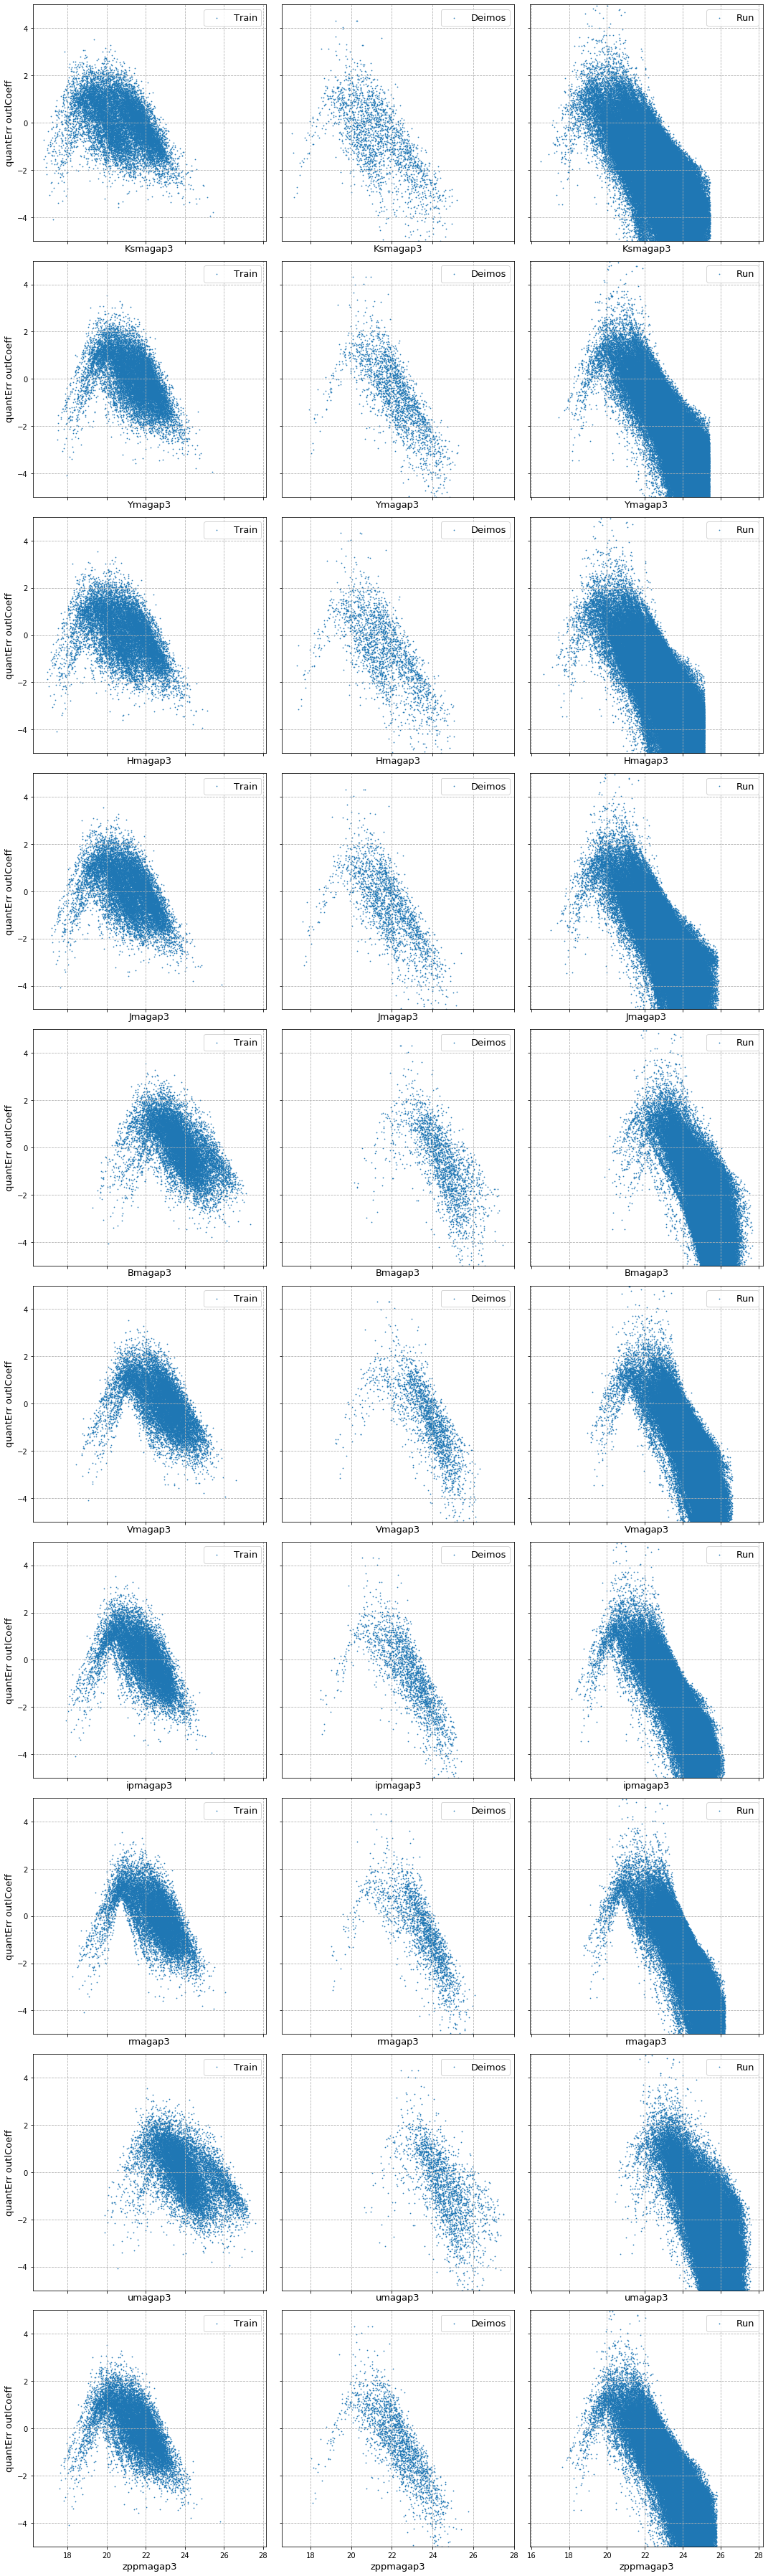

In [59]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharex='col',sharey='row')
for i,mag in enumerate(mags):
    for j,name in enumerate(names):
        dataset=datasets[name]
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[mag],dataset['quantErr'+'_outlCoeff'],s=0.5,label=name)
        axs[i][j].set_xlabel(mag,size=textSize)
        axs[i][j].legend(prop={'size': textSize})
        axs[i][j].set_ylim(-5,5)
    axs[i][0].set_ylabel('quantErr outlCoeff',size=textSize)
plt.tight_layout()

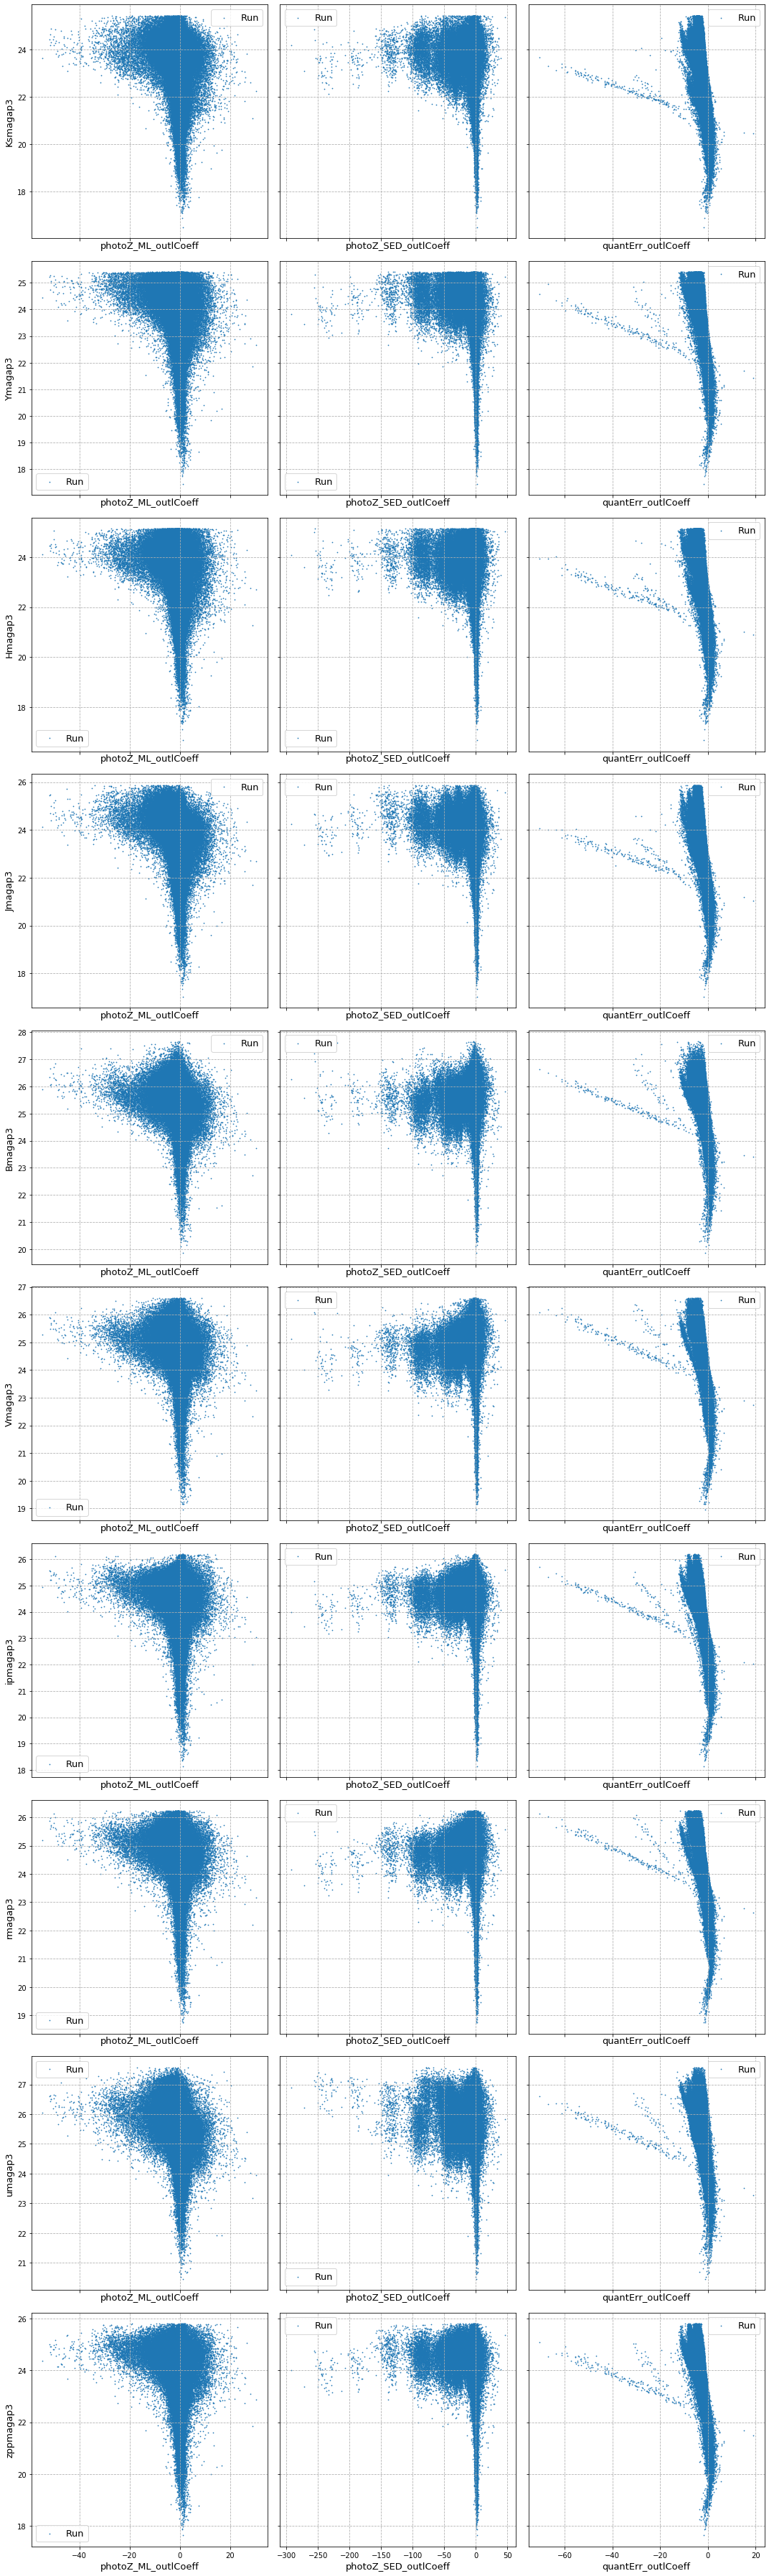

In [64]:
dataset=datasets['Run']
outls=['photoZ_ML_outlCoeff','photoZ_SED_outlCoeff','quantErr_outlCoeff']
fig,axs=plt.subplots(len(mags),3,figsize=(15,5*len(mags)),sharex='col',sharey='row')
for i,mag in enumerate(mags):
    for j,outl in enumerate(outls):
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].scatter(dataset[outl],dataset[mag],s=0.5,label='Run')
        
        axs[i][j].legend(prop={'size': textSize})
        axs[i][j].set_xlabel(outl,size=textSize)
    axs[i][0].set_ylabel(mag,size=textSize)
plt.tight_layout()

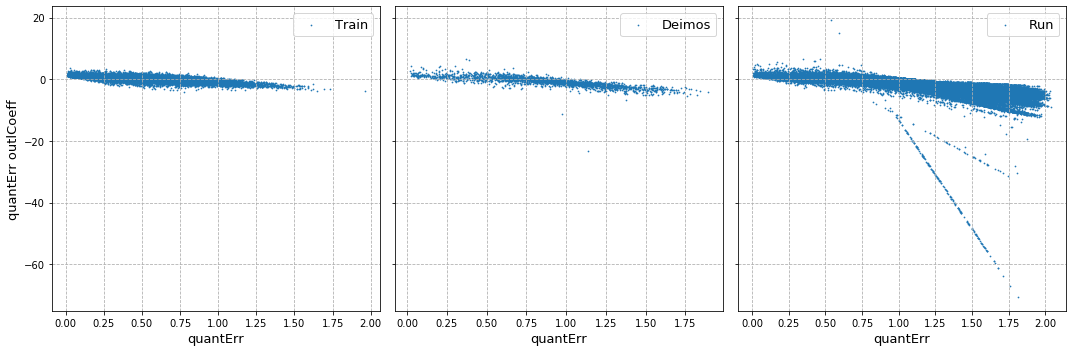

In [70]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(1,3,figsize=(15,5),sharex='col',sharey='row')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset['quantErr'],dataset['quantErr'+'_outlCoeff'],s=0.5,label=name)
    
    axs[i].legend(prop={'size': textSize})
    #axs[i].set_ylim(-5,5)
    
    axs[i].set_xlabel('quantErr',size=textSize)
axs[0].set_ylabel('quantErr outlCoeff',size=textSize)
plt.tight_layout()

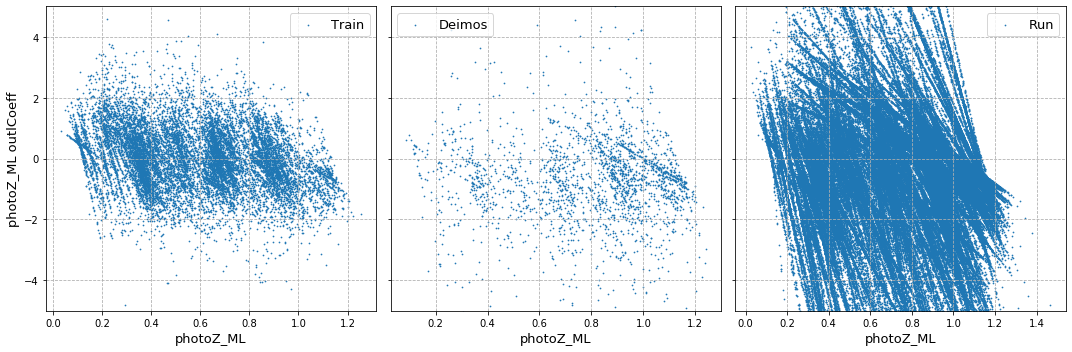

In [72]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(1,3,figsize=(15,5),sharex='col',sharey='row')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset['photoZ_ML'],dataset['photoZ_ML'+'_outlCoeff'],s=0.5,label=name)
    
    axs[i].legend(prop={'size': textSize})
    axs[i].set_ylim(-5,5)
    
    axs[i].set_xlabel('photoZ_ML',size=textSize)
axs[0].set_ylabel('photoZ_ML outlCoeff',size=textSize)
plt.tight_layout()

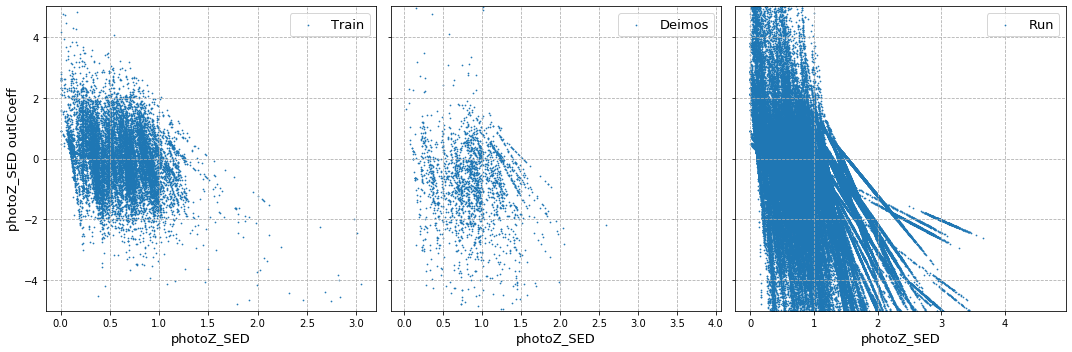

In [74]:
names=['Train','Deimos','Run']
fig,axs=plt.subplots(1,3,figsize=(15,5),sharex='col',sharey='row')
for i,name in enumerate(names):
    dataset=datasets[name]
    axs[i].grid(axis='y',linestyle ='--')
    axs[i].grid(axis='x',linestyle ='--')
    axs[i].scatter(dataset['photoZ_SED'],dataset['photoZ_SED'+'_outlCoeff'],s=0.5,label=name)
    
    axs[i].legend(prop={'size': textSize})
    axs[i].set_ylim(-5,5)
    
    axs[i].set_xlabel('photoZ_SED',size=textSize)
axs[0].set_ylabel('photoZ_SED outlCoeff',size=textSize)
plt.tight_layout()